In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

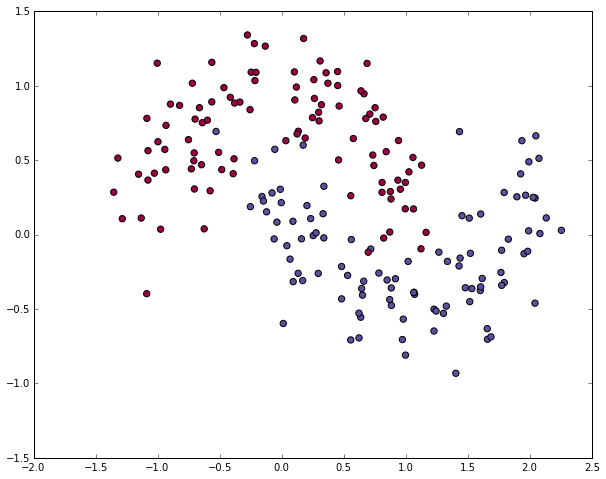

In [3]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [4]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Step #1, epoch #1, avg. loss: 0.86130
Step #1101, epoch #1101, avg. loss: 0.31475
Step #2201, epoch #2201, avg. loss: 0.30320
Step #3301, epoch #3301, avg. loss: 0.30226
Step #4401, epoch #4401, avg. loss: 0.30160
Step #5501, epoch #5501, avg. loss: 0.30099
Step #6601, epoch #6601, avg. loss: 0.30022
Step #7701, epoch #7701, avg. loss: 0.29900
Step #8801, epoch #8801, avg. loss: 0.29582
Step #9901, epoch #9901, avg. loss: 0.17117
Accuracy: 0.980000


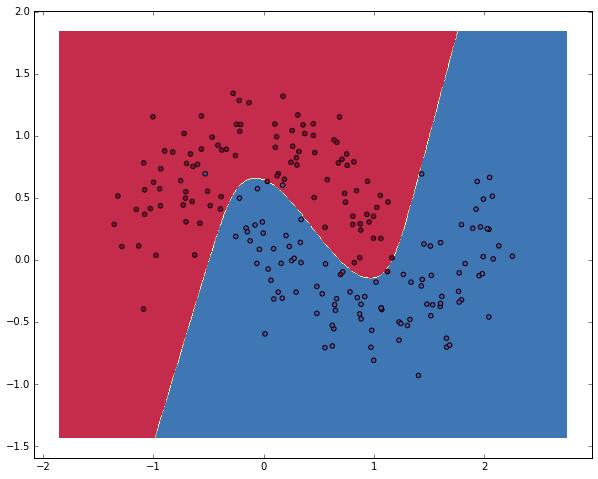

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD


# network dimensions
idim = 2   # features
hdim = 3   # hidden
odim = 2   # classes


import skflow
from sklearn import metrics
import tensorflow as tf


def my_model(X, y):
    layers = skflow.ops.dnn(X, [hdim], activation=tf.nn.tanh)
    return skflow.models.logistic_regression(layers, y)
model = skflow.TensorFlowEstimator(model_fn=my_model, n_classes=odim, optimizer='SGD', learning_rate=0.1, steps=11000, batch_size=200)


model.fit(X, y)
score = metrics.accuracy_score(y, model.predict(X))
print("Accuracy: %f" % score)

plot_decision_boundary(model)
